# import libraries

In [1]:
import numpy as np
import pandas as pd

# read data

In [2]:
data = pd.read_csv('data_2/loan_data.csv')

# show data details

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data[data['LoanAmount'] == 'NaN']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.shape

(614, 13)

In [8]:
data.astype({'Credit_History': 'object'}).dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 1- People how are married & not

In [11]:
data[(data['Gender'] == 'Male') & (data['Married'] == 'Yes')]['Gender'].count()

357

In [12]:
data[(data['Gender'] == 'Male') & (data['Married'] == 'No')]['Gender'].count()

130

In [13]:
data[(data['Gender'] == 'Female') & (data['Married'] == 'Yes')]['Gender'].count()

31

In [14]:
data[(data['Gender'] == 'Female') & (data['Married'] == 'No')]['Gender'].count()

80

# 2- Number of Male & Female

In [15]:
data.groupby('Gender')['Married'].count()

Gender
Female    111
Male      487
Name: Married, dtype: int64

# 3- Volume of loans from cities

In [16]:
data.pivot_table(index ='Property_Area', columns='Gender' , values = 'LoanAmount')

Gender,Female,Male
Property_Area,,
Rural,122.041667,155.882759
Semiurban,135.245283,148.420118
Urban,116.031250,144.032051


# 4- Knowing the people who paid the loan and their cities

In [17]:
data.groupby(['Property_Area','Gender','Married','Loan_Status']).sum()

ApplicantIncome  CoapplicantIncome  \
Property_Area Gender Married Loan_Status                                       
Rural         Female No      N                      36243        4207.000000   
                             Y                      42330        8334.000000   
                     Yes     N                      14666           0.000000   
                             Y                      11242           0.000000   
              Male   No      N                     113025       24439.000000   
                             Y                     120965       40066.000000   
                     Yes     N                     278557       66713.000000   
                             Y                     346838      141736.120001   
Semiurban     Female No      N                      50588        3517.000000   
                             Y                     118242       13338.000000   
                     Yes     N                       2149        3237.000000   
                             Y                      82274       31487.000000   
              Male   No      N                      69047        5544.000000   
                             Y                     169501       54237.000000   
                     Yes     N                     158286       68033.000000   
                             Y                     529363      166633.000000   
Urban         Female No      N                      27878       43530.000000   
                             Y                      85022        8675.000000   
                     Yes     N                      19856        7772.000000   
                             Y                      19532           0.000000   
              Male   No      N                      97361       51038.000000   
                             Y                     110800       23502.000000   
                     Yes     N                     162610       74667.000000   
                             Y                     498392      134931.799988   

                                          LoanAmount  Loan_Amount_Term  \
Property_Area Gender Married Loan_Status                                 
Rural         Female No      N                 927.0            2640.0   
                             Y                1439.0            4440.0   
                     Yes     N                 301.0            1080.0   
                             Y                 262.0             720.0   
              Male   No      N                2985.0            6060.0   
                             Y                3313.0            9000.0   
                     Yes     N                5993.0           12624.0   
                             Y               10312.0           22464.0   
Semiurban     Female No      N                1413.0            3936.0   
                             Y                2453.0            7920.0   
                     Yes     N                 178.0             360.0   
                             Y                3124.0            6504.0   
              Male   No      N                1529.0            4236.0   
                             Y                4118.0           11040.0   
                     Yes     N                4804.0            9060.0   
                             Y               14474.0           33900.0   
Urban         Female No      N                1131.0            3180.0   
                             Y                1694.0            5220.0   
                     Yes     N                 683.0            1440.0   
                             Y                 205.0             720.0   
              Male   No      N                2037.0            6660.0   
                             Y                3029.0            7620.0   
                     Yes     N                4755.0           10920.0   
                             Y               12488.0           27936.0   

                                    

# 5- The men how  Graduate Loan  a lot.

In [18]:
data.groupby(['Gender','Education'])['LoanAmount'].sum()

Gender  Education   
Female  Graduate        11687.0
        Not Graduate     2123.0
Male    Graduate        57352.0
        Not Graduate    12803.0
Name: LoanAmount, dtype: float64

# 6- loans that haven't been returned and returned .

In [19]:
data.groupby(['Gender','Education','Loan_Status'])['LoanAmount'].sum()

Gender  Education     Loan_Status
Female  Graduate      N               4137.0
                      Y               7550.0
        Not Graduate  N                496.0
                      Y               1627.0
Male    Graduate      N              16966.0
                      Y              40386.0
        Not Graduate  N               5137.0
                      Y               7666.0
Name: LoanAmount, dtype: float64

# 7- Return time

In [20]:
data.groupby(['Gender','Education','Loan_Status'])['LoanAmount','Loan_Amount_Term'].sum()

C:\Users\7ouda\AppData\Local\Temp/ipykernel_16516/3943289102.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['Gender','Education','Loan_Status'])['LoanAmount','Loan_Amount_Term'].sum()


LoanAmount  Loan_Amount_Term
Gender Education    Loan_Status                              
Female Graduate     N                4137.0           10836.0
                    Y                7550.0           21084.0
       Not Graduate N                 496.0            1800.0
                    Y                1627.0            4680.0
Male   Graduate     N               16966.0           35724.0
                    Y               40386.0           90960.0
       Not Graduate N                5137.0           13836.0
                    Y                7666.0           21840.0

# 8-Knowing the people how return loan ?

In [21]:
data[(data['Loan_Status'] == 'Y') ].reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
418,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
419,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
420,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


# 9- Knowing the people how return loan & They are  Self_Employed 

## 1- I think they're businessmen.

## 2- Most of them are from Semiurban

## 3- most of them return loan duringIn a year.


In [22]:
data[(data['Loan_Status'] == 'Y') & (data['Self_Employed'] == 'Yes')].reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
1,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
2,25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
3,44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
4,68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
5,71,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
6,74,LP001253,Male,Yes,3+,Graduate,Yes,5266,1774.0,187.0,360.0,1.0,Semiurban,Y
7,79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
8,81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
9,113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y


# 10- people how has CoapplicantIncome ?

## 1-most of them are from male

## 2-most of them are Married 

## 3-most of them are from Semiurban & Rural 

## 4-Few men are Not Graduate.


In [23]:
data[(data['Loan_Status'] == 'Y') &
     (data['Self_Employed'] == 'Yes')&
     (data['CoapplicantIncome'] >=1)].reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
1,71,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
2,74,LP001253,Male,Yes,3+,Graduate,Yes,5266,1774.0,187.0,360.0,1.0,Semiurban,Y
3,79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
4,137,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y
5,151,LP001529,Male,Yes,0,Graduate,Yes,2577,3750.0,152.0,360.0,1.0,Rural,Y
6,185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
7,188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
8,243,LP001807,Male,Yes,2,Graduate,Yes,6250,1300.0,108.0,360.0,1.0,Rural,Y
9,252,LP001841,Male,No,0,Not Graduate,Yes,2583,2167.0,104.0,360.0,1.0,Rural,Y


# 11- Knowing the people how return loan & They are not Self_Employed

## 1- Most of them from Semiurban & Urban

## 2- Most  people are Graduate how return loan

## 3-  A few Female from Semiurban take loan 

## 4- A few Female from Rural take loan 

## 5- A few Female from Urban take loan 

In [24]:
data[(data['Loan_Status'] == 'Y') &
     (data['Self_Employed'] == 'No')].reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
2,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
3,6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
4,8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
339,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
340,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
341,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [25]:
data[(data['Loan_Status'] == 'Y') &
     (data['Self_Employed'] == 'No')&
     (data['Property_Area'] == 'Urban')].reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
2,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
3,6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
4,8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,586,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
107,599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
108,602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
109,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [26]:
data[(data['Loan_Status'] == 'Y') &
     (data['Self_Employed'] == 'No')&
     (data['Property_Area'] == 'Rural')].reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
1,120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
2,124,LP001439,Male,Yes,0,Not Graduate,No,4300,2014.0,194.0,360.0,1.0,Rural,Y
3,125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y
4,126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y
82,607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
83,608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
84,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y


In [27]:
data[(data['Loan_Status'] == 'Y') &
     (data['Self_Employed'] == 'No')&
     (data['Property_Area'] == 'Semiurban')].reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,26,LP001068,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
1,33,LP001098,Male,Yes,0,Graduate,No,3500,1667.0,114.0,360.0,1.0,Semiurban,Y
2,37,LP001112,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y
3,39,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,Y
4,43,LP001131,Male,Yes,0,Graduate,No,3941,2336.0,134.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,587,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
142,588,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y
143,590,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y
144,604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y


# 12- Knowing the people how not return loan & if he  Self_Employed 

## 1- most of them are from Rural & Urban

## 2-most of them didn't have  CoapplicantIncome

## 3- most of them no Credit_History 


In [28]:
data[(data['Loan_Status'] == 'N') & (data['Self_Employed'] == 'Yes')].reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,32,LP001097,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural,N
1,54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
2,62,LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449.0,165.0,180.0,0.0,Rural,N
3,77,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban,N
4,128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N
5,174,LP001603,Male,Yes,0,Not Graduate,Yes,4344,736.0,87.0,360.0,1.0,Semiurban,N
6,186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
7,199,LP001673,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,N
8,226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
9,245,LP001813,Male,No,0,Graduate,Yes,6050,4333.0,120.0,180.0,1.0,Urban,N


# 13 Knowing the people how not return loan & if he Graduate or not

## 1- most of people are Graduate 

## 2- most of them not Self Employed


In [29]:
data[(data['Loan_Status'] == 'N') & (data['Education'] == 'Graduate')].reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
2,9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
3,13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
4,17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
136,591,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
137,597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
138,600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [30]:
data[(data['Loan_Status'] == 'N') & (data['Education'] == 'Not Graduate')].reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
1,20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
2,22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
3,23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
4,28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N
5,62,LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449.0,165.0,180.0,0.0,Rural,N
6,66,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N
7,73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
8,107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
9,112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N


# finally



In [31]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
data['LoanAmount'].isnull().sum()

22

In [35]:
data.dropna(subset = ['LoanAmount'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [33]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
data.duplicated().value_counts()

False    614
dtype: int64

In [45]:
data[data.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = sns.load_dataset('titanic')

In [4]:
data.duplicated().value_counts()

False    784
True     107
dtype: int64

In [5]:
data[data.duplicated()].sort_index()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

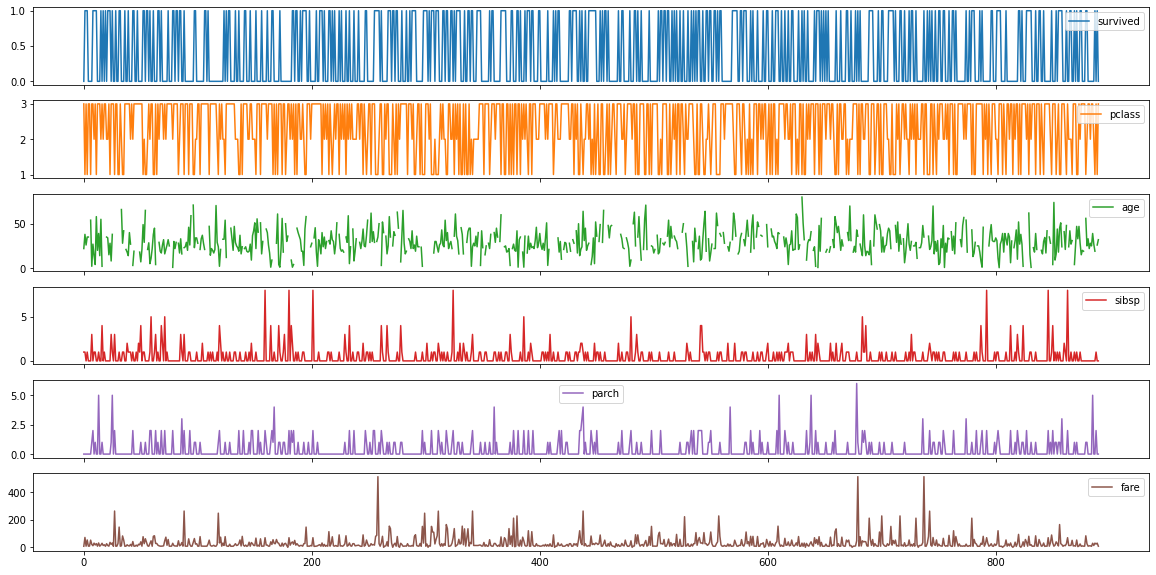

In [5]:
data.plot(subplots = True , figsize = (20,10))

<AxesSubplot:>

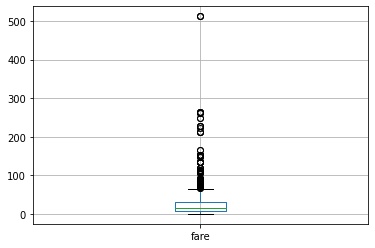

In [6]:
data.boxplot('fare')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
data['sex'].apply(len)

0      4
1      6
2      6
3      6
4      4
      ..
886    4
887    6
888    6
889    4
890    4
Name: sex, Length: 891, dtype: int64

In [9]:
data['sex'].str.isupper()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: sex, Length: 891, dtype: bool

In [10]:
data.loc[data['sex'].str.startswith('m')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
data.loc[data['class'].str.match('Third')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [12]:
data['who'] = data['who'].str.replace('woman','F')

In [13]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,F,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,F,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,F,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,F,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,F,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
data.sex.str.findall('male').count()

891

In [15]:
data['pclass'] = data['pclass'].map({1:'First',2:'Second',3:'Third'})

In [16]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,Third,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,First,female,38.0,1,0,71.2833,C,First,F,False,C,Cherbourg,yes,False
2,1,Third,female,26.0,0,0,7.9250,S,Third,F,False,NaN,Southampton,yes,True
3,1,First,female,35.0,1,0,53.1000,S,First,F,False,C,Southampton,yes,False
4,0,Third,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,First,female,19.0,0,0,30.0000,S,First,F,False,B,Southampton,yes,True
888,0,Third,female,NaN,1,2,23.4500,S,Third,F,False,NaN,Southampton,no,False
889,1,First,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
data['fare'] = ((data['fare'] - data['fare'].mean() )/ data['fare'].std())

<AxesSubplot:>

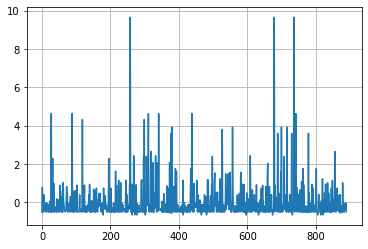

In [18]:
data['fare'].plot(grid = True)

In [19]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,Third,male,22.0,1,0,-0.502163,S,Third,man,True,NaN,Southampton,no,False
1,1,First,female,38.0,1,0,0.786404,C,First,F,False,C,Cherbourg,yes,False
2,1,Third,female,26.0,0,0,-0.488580,S,Third,F,False,NaN,Southampton,yes,True
3,1,First,female,35.0,1,0,0.420494,S,First,F,False,C,Southampton,yes,False
4,0,Third,male,35.0,0,0,-0.486064,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.0,0,0,-0.386454,S,Second,man,True,NaN,Southampton,no,True
887,1,First,female,19.0,0,0,-0.044356,S,First,F,False,B,Southampton,yes,True
888,0,Third,female,NaN,1,2,-0.176164,S,Third,F,False,NaN,Southampton,no,False
889,1,First,male,26.0,0,0,-0.044356,C,First,man,True,C,Cherbourg,yes,True


In [20]:
pd.cut(data['age'] , bins = [0,10,20,30,45,65,100]).value_counts()

(20, 30]     230
(30, 45]     202
(10, 20]     115
(45, 65]      95
(0, 10]       64
(65, 100]      8
Name: age, dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    object  
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(6)
memory usage: 80.7+ KB


In [22]:
data['alive'] = data['alive'].astype('category')

In [23]:
data['alive'].cat.codes

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Length: 891, dtype: int8

In [24]:
 pd.get_dummies(data , columns=['sex' , 'alone' ])

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,sex_female,sex_male,alone_False,alone_True
0,0,Third,22.0,1,0,-0.502163,S,Third,man,True,NaN,Southampton,no,0,1,1,0
1,1,First,38.0,1,0,0.786404,C,First,F,False,C,Cherbourg,yes,1,0,1,0
2,1,Third,26.0,0,0,-0.488580,S,Third,F,False,NaN,Southampton,yes,1,0,0,1
3,1,First,35.0,1,0,0.420494,S,First,F,False,C,Southampton,yes,1,0,1,0
4,0,Third,35.0,0,0,-0.486064,S,Third,man,True,NaN,Southampton,no,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,27.0,0,0,-0.386454,S,Second,man,True,NaN,Southampton,no,0,1,0,1
887,1,First,19.0,0,0,-0.044356,S,First,F,False,B,Southampton,yes,1,0,0,1
888,0,Third,NaN,1,2,-0.176164,S,Third,F,False,NaN,Southampton,no,1,0,1,0
889,1,First,26.0,0,0,-0.044356,C,First,man,True,C,Cherbourg,yes,0,1,0,1


In [26]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [27]:
data.loc[data.embark_town.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,First,female,38.0,0,0,0.961813,NaN,First,F,False,B,NaN,yes,True
829,1,First,female,62.0,0,0,0.961813,NaN,First,F,False,B,NaN,yes,True


In [28]:
data.loc[data.age.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,Third,male,NaN,0,0,-0.477848,Q,Third,man,True,NaN,Queenstown,no,True
17,1,Second,male,NaN,0,0,-0.386454,S,Second,man,True,NaN,Southampton,yes,True
19,1,Third,female,NaN,0,0,-0.502666,C,Third,F,False,NaN,Cherbourg,yes,True
26,0,Third,male,NaN,0,0,-0.502666,C,Third,man,True,NaN,Cherbourg,no,True
28,1,Third,female,NaN,0,0,-0.489502,Q,Third,F,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,Third,male,NaN,0,0,-0.502582,C,Third,man,True,NaN,Cherbourg,no,True
863,0,Third,female,NaN,8,2,0.751524,S,Third,F,False,NaN,Southampton,no,False
868,0,Third,male,NaN,0,0,-0.456886,S,Third,man,True,NaN,Southampton,no,True
878,0,Third,male,NaN,0,0,-0.489167,S,Third,man,True,NaN,Southampton,no,True


In [29]:
data.loc[data.duplicated(subset = ['class'])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,Third,female,26.0,0,0,-0.488580,S,Third,F,False,NaN,Southampton,yes,True
3,1,First,female,35.0,1,0,0.420494,S,First,F,False,C,Southampton,yes,False
4,0,Third,male,35.0,0,0,-0.486064,S,Third,man,True,NaN,Southampton,no,True
5,0,Third,male,NaN,0,0,-0.477848,Q,Third,man,True,NaN,Queenstown,no,True
6,0,First,male,54.0,0,0,0.395591,S,First,man,True,E,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.0,0,0,-0.386454,S,Second,man,True,NaN,Southampton,no,True
887,1,First,female,19.0,0,0,-0.044356,S,First,F,False,B,Southampton,yes,True
888,0,Third,female,NaN,1,2,-0.176164,S,Third,F,False,NaN,Southampton,no,False
889,1,First,male,26.0,0,0,-0.044356,C,First,man,True,C,Cherbourg,yes,True


In [33]:
data =sns.load_dataset('tips')

In [34]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


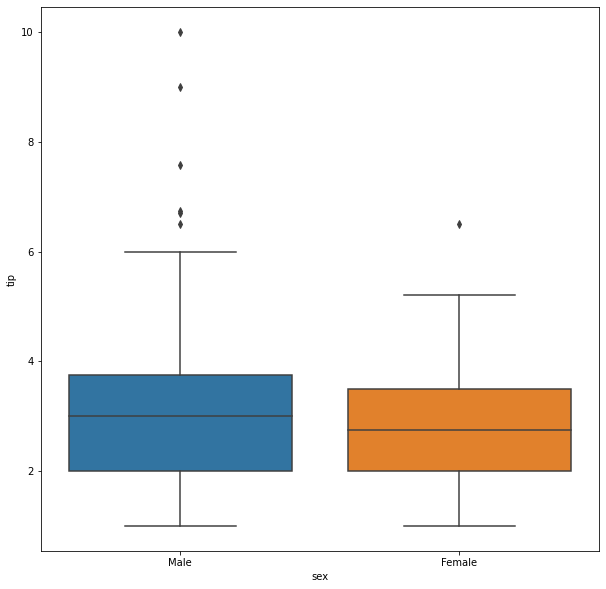

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(data['sex'],data['tip'])
plt.show()

In [50]:
0//1

0

TypeError: set_theme() got an unexpected keyword argument 'xticks'

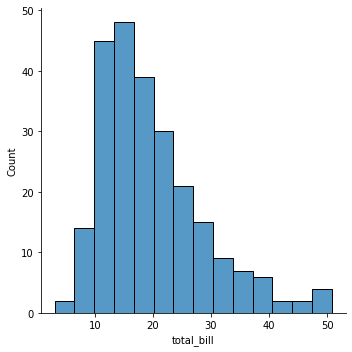

In [54]:
sns.displot(data['total_bill'])
sns.set(xticks=data.total_bill[2::8])
